In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from torch_geometric.datasets.qm9 import QM9

In [3]:
import deepchem as dc
import torch
from pathlib import Path
import sys
sys.path.append('src')
from dfs_transformer import QM9 as myQM9


target_idx = 7
HAR2EV = 27.211386246
KCALMOL2EV = 0.04336414

conversion = torch.tensor([
    1., 1., HAR2EV, HAR2EV, HAR2EV, 1., HAR2EV, HAR2EV, HAR2EV, HAR2EV, HAR2EV,
    1., KCALMOL2EV, KCALMOL2EV, KCALMOL2EV, KCALMOL2EV, 1., 1., 1.
])

atomrefs = {
    6: [0., 0., 0., 0., 0.],
    7: [
        -13.61312172, -1029.86312267, -1485.30251237, -2042.61123593,
        -2713.48485589
    ],
    8: [
        -13.5745904, -1029.82456413, -1485.26398105, -2042.5727046,
        -2713.44632457
    ],
    9: [
        -13.54887564, -1029.79887659, -1485.2382935, -2042.54701705,
        -2713.42063702
    ],
    10: [
        -13.90303183, -1030.25891228, -1485.71166277, -2043.01812778,
        -2713.88796536
    ],
    11: [0., 0., 0., 0., 0.],
}

conversion_dir = {7: HAR2EV}


tasks, dsets, transformers = dc.molnet.load_qm9(reload=False, featurizer=dc.feat.RawFeaturizer(True), splitter=None)
smiles = dsets[0].X
y = dsets[0].y[:, target_idx]*conversion_dir[target_idx]


2021-12-07 23:36:23.708832: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/cuda/extras/CUPTI/lib64/:/opt/intel/lib:/opt/intel/mkl/lib/intel64:/opt/intel:/opt/ibm/ILOG/CPLEX_Studio1210/cplex/bin/x86-64_linux:/opt/ibm/ILOG/CPLEX_Studio1210/cplex/python/3.7/x86-64_linux:/opt/intel/clck_latest/lib:/opt/intel/daal/lib:/opt/intel/intelpython3/lib:/opt/intel/ipp/lib:/opt/intel/itac_2019/lib:/opt/intel/itac_latest/lib:/opt/intel/mkl/lib:/opt/intel/mkl_/lib:/opt/intel/mpirt/lib:/opt/intel/tbb/lib:/opt/intel/clck/2019.0/lib:/opt/intel/compilers_and_libraries_2019/linux/lib:/opt/intel/compilers_and_libraries/linux/lib:/opt/intel/itac/2019.0.018/lib:/opt/intel/itac_2019/intel64/lib:/opt/intel/itac_latest/intel64/lib:/opt/intel/parallel_studio_xe_2019.0.045/clck_2019/lib:/opt/intel/parallel_studio_xe_2019.0.045/itac_2019/l

In [4]:
y

array([-113.4719697 , -114.30691688, -116.02046861, ...,   -4.80332159,
         -1.02150202,  -11.7503004 ])

In [5]:
qm9 = QM9("datasets/qm9_torch_geometric/")

In [6]:
import numpy as np

In [7]:
y2 = np.asarray([d.y[0, target_idx] for d in qm9])

In [8]:
from matplotlib import pyplot as plt

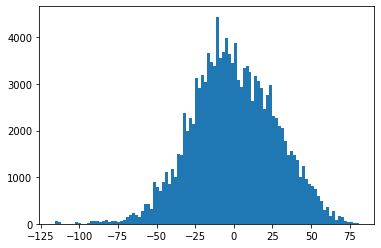

In [9]:
plt.hist(y, bins='rice')
plt.show()

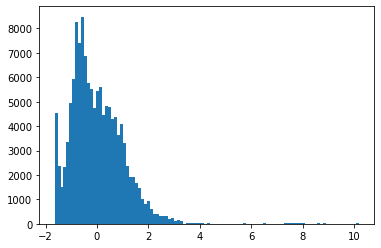

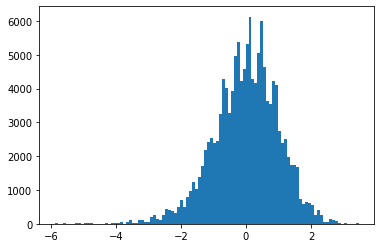

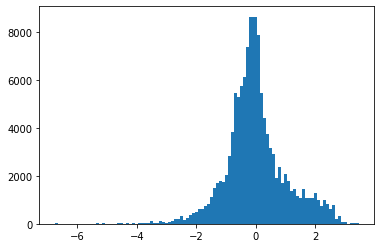

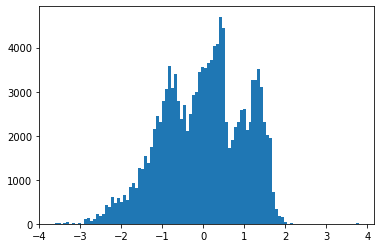

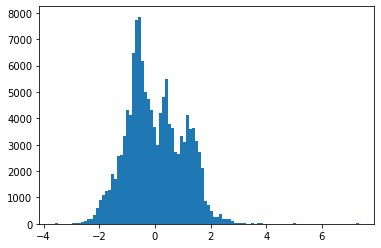

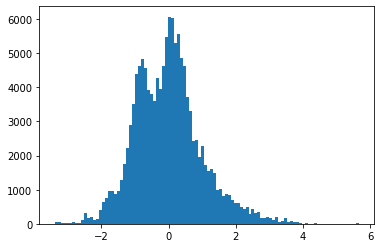

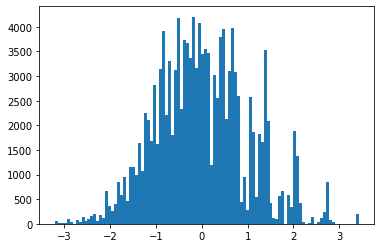

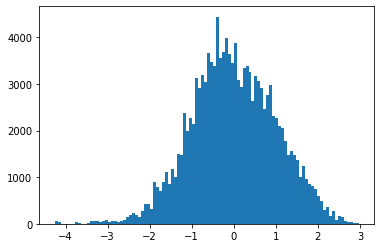

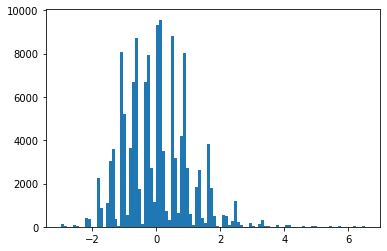

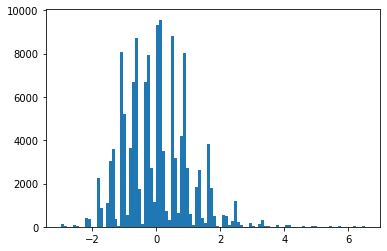

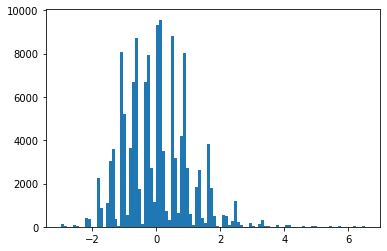

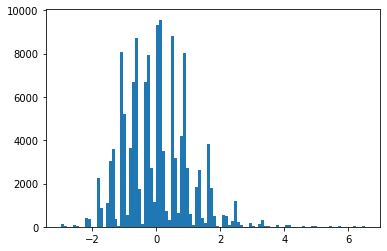

In [10]:
for j in range(dsets[0].y.shape[1]):
    plt.hist(dsets[0].y[:, j], bins='rice')
    plt.show()

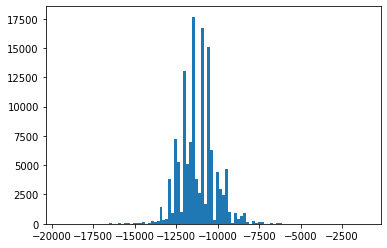

In [11]:
plt.hist(y2, bins='rice')
plt.show()

In [12]:
qm92 = myQM9(split='train', path="datasets/myqm9/noH/")

110000it [00:46, 2344.82it/s]


In [22]:
residuals = qm92.compute_residuals()

In [26]:
residuals = np.asarray(residuals)

In [27]:
print(residuals[1])

[-1640.4489]


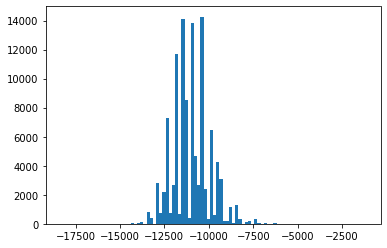

In [28]:
plt.hist(residuals, bins='rice')
plt.show()